# Diabetes Prediction Dataset

**Description:**

Welcome to the **Diabetes Prediction Dataset**, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

**Columns:**

- **Id:** Unique identifier for each data entry.
- **Pregnancies:** Number of times pregnant.
- **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- **BloodPressure:** Diastolic blood pressure (mm Hg).
- **SkinThickness:** Triceps skinfold thickness (mm).
- **Insulin:** 2-Hour serum insulin (mu U/ml).
- **BMI:** Body mass index (weight in kg / height in m^2).
- **DiabetesPedigreeFunction:** Diabetes pedigree function, a genetic score of diabetes.
- **Age:** Age in years.
- **Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.




In [1]:
import seaborn as sns # for making plots
import matplotlib.pyplot as plt # for making plots
from sklearn.model_selection import train_test_split # for splitting our data into train and test set
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix # for evaluating the performance of the model
from xgboost import XGBClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Jobs/Mr Dayo/DIABETES PREDICTION/Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Basic Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


## Five Number Summary

In [6]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome'>

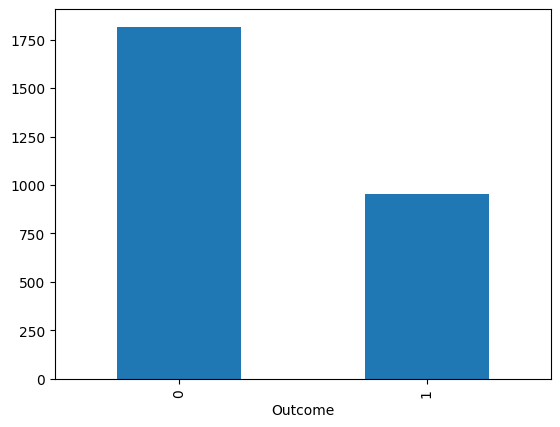

In [7]:
df["Outcome"].value_counts().plot(kind="bar")

1 represents the people having diabetes on the dataset while 0 represent the people that do not have diabetes.
And as we can see here, we have an umbalanced dataset. this could affect our model's ability to make predictions. we need to balance the data.

In [8]:
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.duplicated().sum()

0

In [10]:
df=df.drop(columns=["Id"])

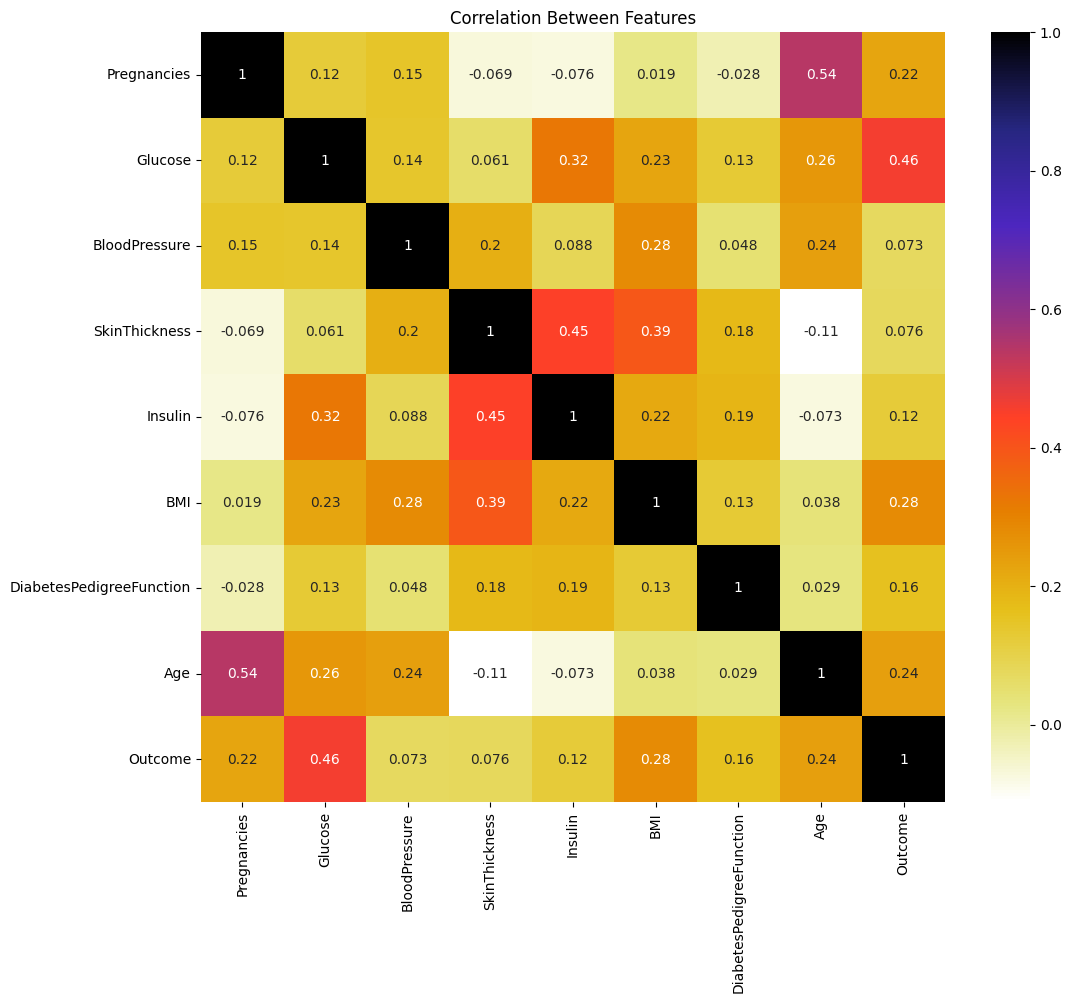

In [11]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.title('Correlation Between Features')
plt.show();

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [14]:
# bc = BaggingClassifier(n_estimators=150, random_state=2)
model =  XGBClassifier(random_state=42, n_jobs=1) # Parameter tree_method='gpu_hist' for XGBoost GPU


In [15]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=1,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(accuracy_score(y_test,y_pred))
print()
print(precision_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

0.9891696750902527

0.989010989010989

[[368   2]
 [  4 180]]


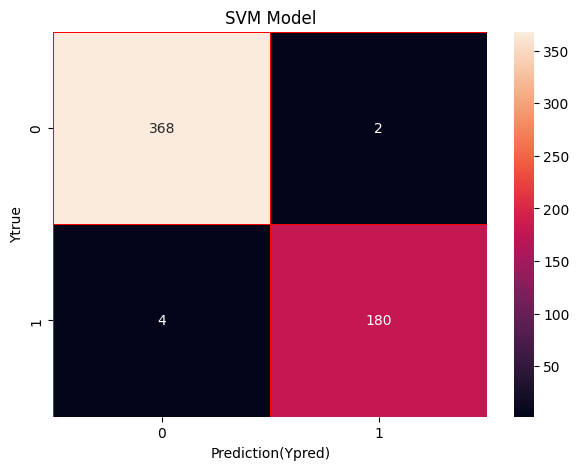

In [18]:
CM = confusion_matrix(y_test,y_pred)


f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("SVM Model")
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

 XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9891696750902527


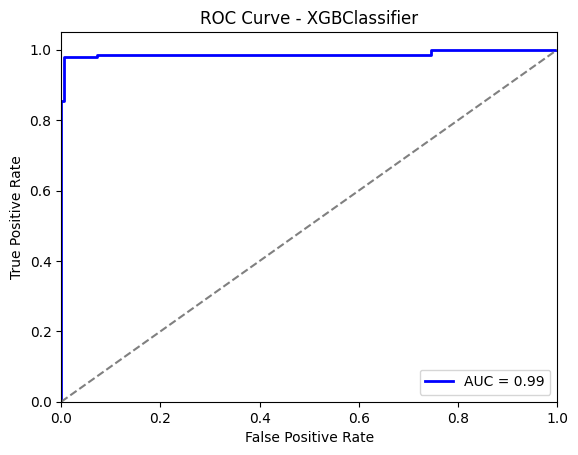

------------------


In [19]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [XGBClassifier(random_state=42)]

# Evaluate each model

model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f" {type(model).__name__}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Calculate positive class probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {type(model).__name__}')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

print("------------------")

--

**ROC Curves XGBClassifier**
  - **AUC:** 0.99
  - The XGBoost model also shows strong performance with an AUC of 0.99



In [26]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
KC_pkl_filename = '/content/drive/MyDrive/Jobs/Mr Dayo/DIABETES PREDICTION/XGBoost_model.pkl'

# Open the file to save as pkl file
KC_Model_pkl = open(KC_pkl_filename, 'wb')
pickle.dump(model, KC_Model_pkl)

# Close the pickle instances
KC_Model_pkl.close()

In [31]:
print(xgboost.__version__)

2.1.1


In [30]:
import xgboost